In [1]:
import os, sys
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
from interactive_utils import *
from utils.utils import write_FASTA
from Bridgeport.Bridgeport import Bridgeport
import py3Dmol
from datetime import datetime

/home/dcooper/anaconda3/envs/prep/lib/python3.12/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


**Let's start with some basic information...**

**Protein Input**

- *input_pdb_dir*: (str) path to directory where the *input_pdb* can be found. 
- *input_pdb*: (str) name of input structure
- *chain*: (str) of chain to use from *input_pdb* to align

**Ligand Input** (if you are doing an analogue, fill in this information for the templace ligand in your experimental structure)

- *name*: (str) a name for your ligand
- *resname*: (str) resname of ligand found in *input_pdb*. If the ligand, is a peptide set to "False".
- *chainid*: (str) if ligand is a peptide, specify the letter code that denotes the ligand, if not set to "False".
- *smiles*: (str) smiles string for you ligand. 

In [2]:
# Set you working directory
input_dir = '/home/dcooper/projects/MOR'

In [3]:
# Protein input
input_pdb_dir = os.path.join(input_dir, 'crystal_pdb') # Change as needed
input_pdb = '8ef5.pdb' # Change as needed
chain = 'R' # Change as needed

# Ligand input
name = '8ef5'
resname = '7V7'
chainid = False
smiles = 'CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3'


In [4]:
# Build initial .json file and BP object
working_dir = os.getcwd()
json_dict = {'working_dir': working_dir}

# Update params
json_dict['Protein'] = {'input_pdb_dir': input_pdb_dir,
                        'input_pdb': input_pdb,
                        'chain': chain}


json_dict['Ligand'] = {'name': name,
                       'resname': resname,
                       'chainid': chainid,
                       'smiles': smiles}

json_fn = 'interactive.json'
write_json(json_dict, json_fn)
start = datetime.now()
BP = Bridgeport(json_fn)

10/23/2024 22:18:58//Welcome to Bridgeport.
10/23/2024 22:18:58//Found input parameters.
10/23/2024 22:18:58//working_dir:
10/23/2024 22:18:58//working_dir: /home/dcooper/git/Bridgeport/interactive
10/23/2024 22:18:58//Protein:
10/23/2024 22:18:58//	input_pdb_dir: /home/dcooper/projects/MOR/crystal_pdb
10/23/2024 22:18:58//	input_pdb: 8ef5.pdb
10/23/2024 22:18:58//	chain: R
10/23/2024 22:18:58//Ligand:
10/23/2024 22:18:58//	name: 8ef5
10/23/2024 22:18:58//	resname: 7V7
10/23/2024 22:18:58//	chainid: False
10/23/2024 22:18:58//	smiles: CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3


**OPTIONAL** **Build an analogue from a template ligand**

0.1 **Get maximum common substructure**

- *name*: (str) a name for your ligand
- *smiles*: (str) smiles str of your analogue.
- *add_atoms*: (List[List[int]]) List of atom inds as depicted to be added to common substructure. Ex: [[0, 1], [2, 4]] where atoms 0 and 2 in the analogue match atoms 1 and 4 in the template, respectively. Default is False, which will use automatically determined maximum common substructure.
- *remove_atoms*: (List[int[) List of atoms inds to remove from the analogue. The corresponding atoms from the template structure will be removed automatically. Default is False, which will use automatically determined maximum common substructure.

10/23/2024 22:18:58//Found directory for ligand structures: /home/dcooper/git/Bridgeport/interactive/ligands
10/23/2024 22:18:58//Must set either resname or chainid
10/23/2024 22:18:58//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/8ef5.pdb /home/dcooper/git/Bridgeport/interactive/ligands/8ef5.sdf
10/23/2024 22:18:58//Must set either resname or chainid
10/23/2024 22:18:58//Created analogue carfentanil from smiles: CCC(=O)N(C1=CC=CC=C1)C2(CCN(CC2)CCC3=CC=CC=C3)C(=O)OC
10/23/2024 22:18:58//Created known ligand 8ef5 from smiles: CCC(=O)N(C1CCN(CC1)CCC2=CC=CC=C2)C3=CC=CC=C3
Analogue, Template


[22:18:58] WARNING: More than one matching pattern found - picking one



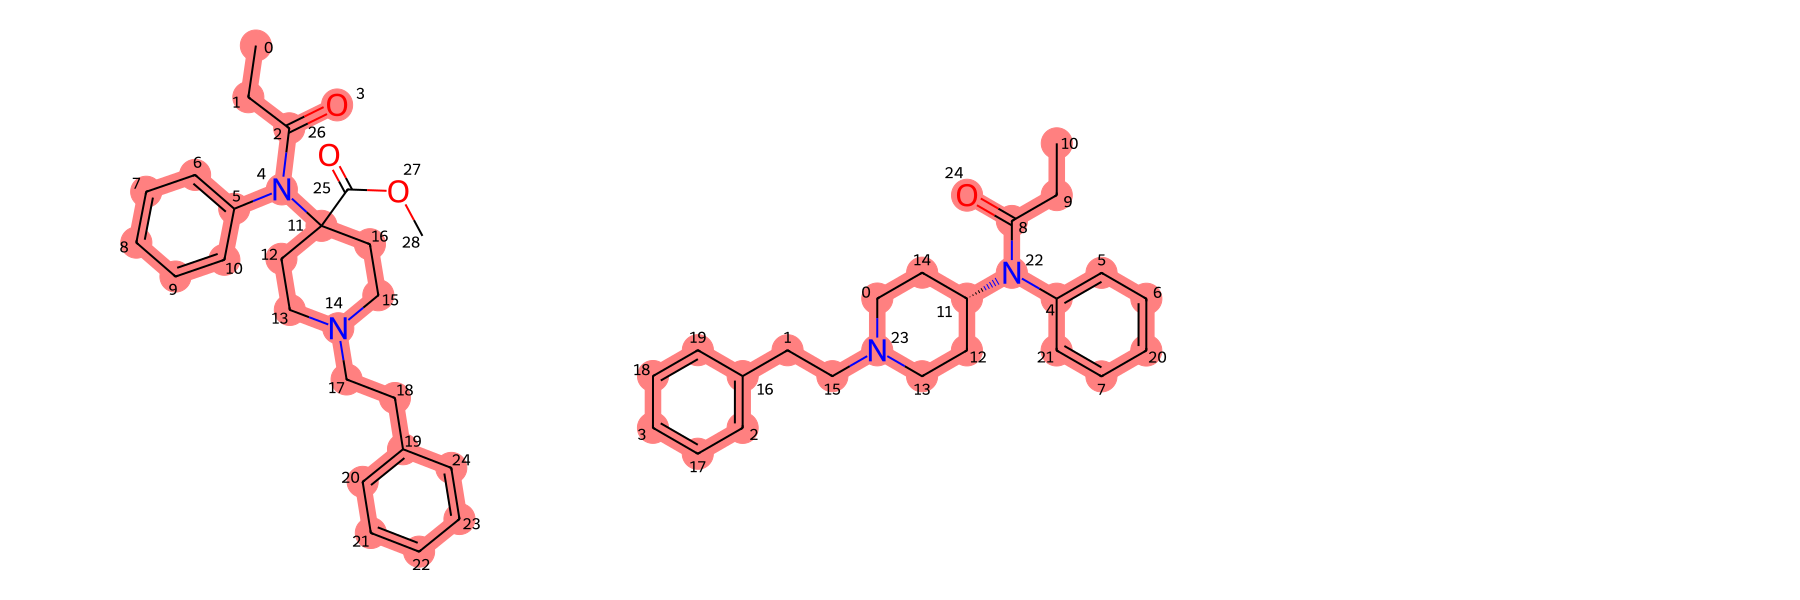

In [5]:
# Analogue input
name = 'carfentanil' # Change as needed
smiles = 'CCC(=O)N(C1=CC=CC=C1)C2(CCN(CC2)CCC3=CC=CC=C3)C(=O)OC' # Change as needed
add_atoms = None # Change as needed
remove_atoms = None # Change as needed


# Update params
BP.input_params['Ligand']['Analogue'] = {'name': name,
                                         'smiles': smiles,
                                         'add_atoms': add_atoms,
                                         'remove_atoms': remove_atoms}
BP.get_analogue_MCS()

**OPTIONAL** **Build an analogue from a template ligand**

0.2 **Align analogue to tempalte**

- *align_all*: (bool) If True, will use atoms in *add_atoms* for alignment. Default is False which will only use the automatically detected maximum common substructure.
- *rmsd_tresh*: (float) RMSD threshold that analogue conformation must reach during alignment to be accepted as a permittable structure. Default is 3.0 Angstrom.

In [6]:
# Inputs
align_all = False # Change as needed
rmsd_thresh = 3.0 # Change as needed

# Update params
BP.input_params['Ligand']['Analogue']['align_all'] = align_all
BP.input_params['Ligand']['Analogue']['rmsd_thresh'] = rmsd_thresh


BP.build_analogue_complex() #TODO: 
BP.analogue.visualize_alignment()

10/23/2024 22:18:58//Saved conformer to /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil_conformers/carfentanil_0.pdb


[22:18:58] Molecule does not have explicit Hs. Consider calling AddHs()
[22:18:58] Molecule does not have explicit Hs. Consider calling AddHs()
[22:18:58] Molecule does not have explicit Hs. Consider calling AddHs()


10/23/2024 22:18:58//Saved conformer to /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil_conformers/carfentanil_1.pdb
10/23/2024 22:18:58//Saved first conformer to /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil.pdb
10/23/2024 22:18:58//Changing input_pdb to: /home/dcooper/projects/MOR/crystal_pdb/carfentanil.pdb
10/23/2024 22:18:58//Built new inital complex.
10/23/2024 22:18:58//Changing ligand resname to: UNL
BLUE: carfentanil
YELLOW: 8ef5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

1. **Align your protein to a reference structure**
- *reference_pdb*: (str) path to refence structure to align input structure to
- *reference_chain*: (List[str]) of chains of the *reference_pdb* to use in the alignment process

In [7]:
# Set input paths
reference_pdb = os.path.join(input_dir, 'OPM', '5c1m.pdb') # Change as needed
reference_chain = ['A'] # Change as needed

# Update input params
BP.input_params['Environment'] = {'alignment_ref': reference_pdb,
                                  'reference_chain': reference_chain}

# Align
BP.align_to_reference()

# Visualizes aligned structures
view = py3Dmol.view()
view.setBackgroundColor('white')
view.addModel(open(BP.aligned_pdb, 'r').read(),'pdb')
view.addModel(open(reference_pdb, 'r').read(),'pdb')
view.setStyle({'model':0}, {'cartoon': {'color':'blue'}})
view.setStyle({'model':1}, {'cartoon': {'color':'yellow'}})
view.zoomTo()
view.show()


10/23/2024 22:18:58//Found directory for aligned input structures: /home/dcooper/git/Bridgeport/interactive/aligned_input_pdb
10/23/2024 22:18:58//Found references structure /home/dcooper/projects/MOR/OPM/5c1m.pdb and will align to chains ['A']
10/23/2024 22:18:58//Found input structure: /home/dcooper/projects/MOR/crystal_pdb/carfentanil.pdb
10/23/2024 22:18:58//Saved aligned structure to: /home/dcooper/git/Bridgeport/interactive/aligned_input_pdb/carfentanil.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

2. **Seperate your ligand and protein for individual preparations**

In [8]:
# Separate
BP.separate_lig_prot()

10/23/2024 22:18:58//Found directory for protein structures: /home/dcooper/git/Bridgeport/interactive/proteins
10/23/2024 22:18:58//Found directory for ligand structures: /home/dcooper/git/Bridgeport/interactive/ligands
10/23/2024 22:18:59//Separated chain(s) R from input structure
10/23/2024 22:18:59//Separated ligand UNL from input structure with 29 atoms


3. **Repair the protein**
   - *tails*: List of indices to parse the extra tails. EX: [30, 479]
   - *loops*: 2-D List of indices that specify lower and upper bounds of loops to optimize during refinement. Loop optimization can take a while, but if skipped, unbonded output structures will result.
   - *secondary_template*: Path to secondary .pdb to use as a reference to accurately model large portions that are missing in the input .pdb structure.
   - *engineered_resids*: List of resids that are known engineered mutations in the crystal pdb. Adding this argument may prevent sequence errors in the RepairProtein section of Bridgeport.
   - *receptor_gene*: (str) gene of the receptor
   - *sequence*: (str) sequence of the receptor you are trying to model

In [9]:
# Set input
tails = [66, 352] # Change as needed
loops = False # Change as needed
secondary_template = None # Change as needed
engineered_resids = None # Change as needed
receptor_gene = 'ORPM' # Change as needed
sequence = """
MDSSAAPTNASNCTDALAYSSCSPAPSPGSWVNLSHLDGNLSDPCGPNRTDLGGRDSLCPPTGSPSMITAITIMALYSIVCVVGLFGNFLVMYVIVRYTKMKTATNIYIFNLALADALATSTLPFQSVNYLMGTWPFGTILCKIVISIDYYNMFTSIFTLCTMSVDRYIAVCHPVKALDFRTPRNAKIINVCNWILSSAIGLPVMFMATTKYRQGSIDCTLTFSHPTWYWENLLKICVFIFAFIMPVLIITVCYGLMILRLKSVRMLSGSKEKDRNLRRITRMVLVVVAVFIVCWTPIHIYVIIKALVTIPETTFQTVSWHFCIALGYTNSCLNPVLYAFLDENFKRCFREFCIPTSSNIEQQNSTRIRQNTRDHPSTANTVDRTNHQLENLEAETAPLP
""" # Change as needed

# Write FASTA
fasta_path = os.path.join(input_dir, 'fasta', f'{receptor_gene}.fasta')
write_FASTA(sequence, receptor_gene, fasta_path)

# Update params
BP.input_params['RepairProtein'] = {'fasta_path': fasta_path,
                                    'working_dir': os.path.join(os.getcwd(), 'modeller_intermediates'),
                                    'tails': tails, 
                                    'loops': loops,
                                    'secondary_template': secondary_template,
                                    'engineered_resids': engineered_resids}
# Repair
BP.repair_protein()

# Visualizes repaired protein
view = py3Dmol.view()
view.setBackgroundColor('white')
view.addModel(open(os.path.join(BP.prot_only_dir, name + '.pdb'), 'r').read(),'pdb')
view.setStyle({'model':0}, {'cartoon': {'color':'blue'}})
view.zoomTo()
view.show()

10/23/2024 22:18:59//Welcome to RepairProtein
10/23/2024 22:18:59//Protein to repair: /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil.pdb
10/23/2024 22:18:59//Template sequence: /home/dcooper/projects/MOR/fasta/ORPM.fasta
10/23/2024 22:18:59//Modeller intermediates will be written to: /home/dcooper/git/Bridgeport/interactive/modeller_intermediates
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
ORPM.B99990001.pdb            1305.08765

10/23/2024 22:19:06//Protein Repaired. Output written to: /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil.pdb


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

4. **Build the environment**

- "membrane": If membrane should be specified choose "true", and make sure that "alignment_ref" argument is the appropriate OPM structure. Default is false.
- "pH": Specify the pH. Default is 7.0.
- "ion_strength": Specify the concentration of NaCl ions (in Molar). Default is 0.15 M.


In [10]:
# Set input
membrane = True # Change as needed
pH = 7.2 # Change as needed
ion_strength = 0.15 # Change as needed

BP.input_params['Environment']['membrane'] = membrane
BP.input_params['Environment']['pH'] = pH
BP.input_params['Environment']['ion_strength'] = ion_strength

BP.add_environment()

10/23/2024 22:19:06//Welcome to ProteinPreparer
10/23/2024 22:19:06//Protonating protein with pdb2pqr30
Protanting using command line
Running pdb2pqr30 --ff AMBER --nodebump --keep-chain --ffout AMBER --pdb-output /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil_H.pdb --with-ph 7.0 /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil.pdb /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil.pqr


INFO:PDB2PQR v3.6.1: biomolecular structure conversion software.
INFO:Please cite:  Jurrus E, et al.  Improvements to the APBS biomolecular solvation software suite.  Protein Sci 27 112-128 (2018).
INFO:Please cite:  Dolinsky TJ, et al.  PDB2PQR: expanding and upgrading automated preparation of biomolecular structures for molecular simulations. Nucleic Acids Res 35 W522-W525 (2007).
INFO:Checking and transforming input arguments.
INFO:Loading topology files.
INFO:Loading molecule: /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil.pdb
INFO:Setting up molecule.
INFO:Created biomolecule object with 286 residues and 2304 atoms.
INFO:Setting termini states for biomolecule chains.
INFO:Loading forcefield.
INFO:Loading hydrogen topology definitions.
INFO:This biomolecule is clean.  No repair needed.
INFO:Updating disulfide bridges.
INFO:Adding hydrogens to biomolecule.
INFO:Optimizing hydrogen bonds


10/23/2024 22:19:07//Output written to: /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil_H.pdb
10/23/2024 22:19:07//Creating environment with pdbfixer


INFO:Applying force field to biomolecule states.
INFO:Applying custom naming scheme (amber).
INFO:Regenerating headers.
INFO:Regenerating PDB lines.


10/23/2024 22:19:15//Output written to: /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil_env.pdb
10/23/2024 22:19:15//Trimming /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil_env.pdb with padding of 15 Angstroms.
10/23/2024 22:19:16//Identified new box size: [ 76.162     72.156006 103.901   ]
10/23/2024 22:19:16//Writing new CRYST1 line: CRYST1   76.162   72.156  103.901  90.00  90.00  90.00 P 1           
10/23/2024 22:19:16//Identified  35835 atoms to remove.
10/23/2024 22:19:16//Identified  5147 resids to remove.
10/23/2024 22:19:16//Untrimmed no. of atoms: 86178
10/23/2024 22:19:29//Trimmed no. of atoms: 18910
10/23/2024 22:19:29//Trimmed environment saved to: /home/dcooper/git/Bridgeport/interactive/proteins/carfentanil_env.pdb


5. **Prepare the ligand**
- *small_molecule_params (bool)*: If true, treat ligand like a small molecule. Default is True.
- *sanitize (bool)*: If true, sanitize molecule with rdkit. Default is True. Only applicable if small_molecule_params is True. 
- *removeHs (bool)*: If true, remove any hydrogens that may be present. Default is True. Only applicable if small_molecule_params is True.
- *proximityBonding* (bool): If true, use rdkit's 'proximityBonding' method to load rdkit molecule. 
- *pH (float)*: pH to protonate a peptide ligand. Default is 7.0.
- *nstd_resids (List[int])*: List of nonstandard resids to conserve from input structure. 
- *neutral_Cterm (bool)*: If true, neutralize the C-terminus of a peptide ligand. Only applicable is small_molecule_params is False


10/23/2024 22:19:29//Must set either resname or chainid


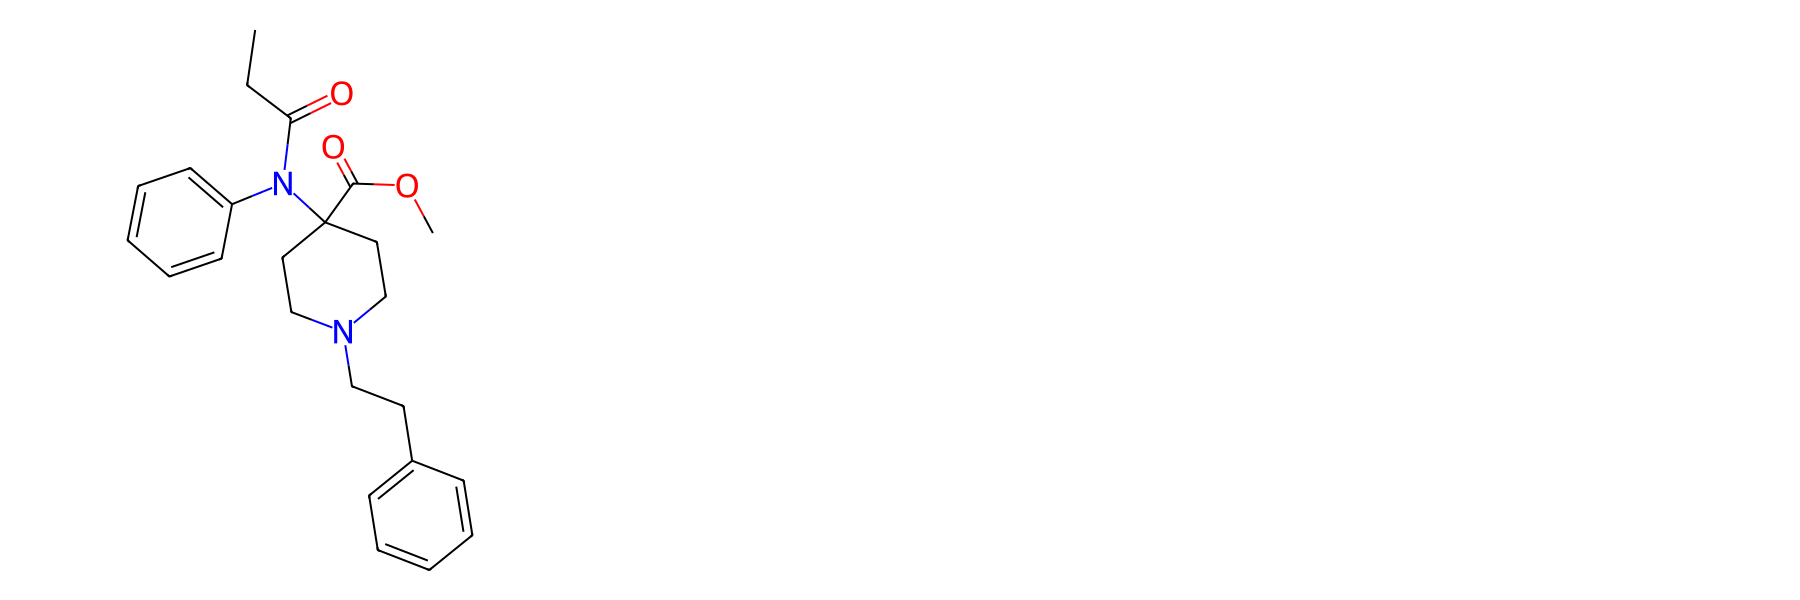

10/23/2024 22:19:29//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil.pdb /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil.sdf
10/23/2024 22:19:29//Must set either resname or chainid
10/23/2024 22:19:29//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil_conformers/carfentanil_0.pdb /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil_conformers/carfentanil_0.sdf
10/23/2024 22:19:29//Must set either resname or chainid
10/23/2024 22:19:29//Saved prepared ligand to /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil_conformers/carfentanil_1.pdb /home/dcooper/git/Bridgeport/interactive/ligands/carfentanil_conformers/carfentanil_1.sdf


[22:19:29] WARNING: More than one matching pattern found - picking one

[22:19:29] WARNING: More than one matching pattern found - picking one

[22:19:29] WARNING: More than one matching pattern found - picking one



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [11]:
# Ligand Input
small_molecule_params = True # Change as needed
sanitize = True # Change as needed
removeHs = True # Change as needed
proximityBonding = False # Change as needed
nstd_resids = None # Change as needed
pH = 7.0 # Change as needed
neutral_Cterm = False # Change as needed

# Update params
BP.input_params['Ligand']['small_molecule_params'] = small_molecule_params
BP.input_params['Ligand']['sanitize'] = sanitize
BP.input_params['Ligand']['removeHs'] = removeHs
BP.input_params['Ligand']['proximityBonding'] = proximityBonding
BP.input_params['Ligand']['nstd_resids'] = nstd_resids
BP.input_params['Ligand']['pH'] = pH
BP.input_params['Ligand']['neutral_Cterm'] = neutral_Cterm

# Prepare
BP.ligand_prep()

# Visualizes ligand sdf and pdb
view = py3Dmol.view()
view.setBackgroundColor('white')
if hasattr(BP, 'lig_sdf'):
    view.addModel(open(BP.lig_sdf, 'r').read(),'sdf')
else:
    view.addModel(open(BP.lig_pdb, 'r').read(),'pdb')
view.setStyle({'model':0}, {'stick': {'colorscheme':'cyanCarbon'}})
view.zoomTo()
view.show()


6. **Build the forcefields**


In [12]:
BP.generate_systems()

10/23/2024 22:19:29//Building parameters for carfentanil
10/23/2024 22:19:30//Protein parameters built.
10/23/2024 22:21:10//Ligand parameters built.
10/23/2024 22:21:10//System parameters built.
10/23/2024 22:21:11//Initial structure potential energy: 313201571737.05
10/23/2024 22:21:11//Final system coordinates saved to /home/dcooper/git/Bridgeport/interactive/systems/carfentanil.pdb
10/23/2024 22:21:11//Final system parameters saved to /home/dcooper/git/Bridgeport/interactive/systems/carfentanil.xml


**Save you input_parameters to a .json file**
- *json_fn*: str path to .json file where you would like to save your input parameters

In [13]:
# Set .json location
json_fn = 'interactive.json'
write_json(BP.input_params, json_fn)

print('WROTE:', '\n', read_json(json_fn))
print('TOOK:', datetime.now() - start)

WROTE: 
 {'working_dir': '/home/dcooper/git/Bridgeport/interactive', 'Protein': {'input_pdb_dir': '/home/dcooper/projects/MOR/crystal_pdb', 'input_pdb': '8ef5.pdb', 'chain': 'R'}, 'Ligand': {'name': '8ef5', 'resname': '7V7', 'chainid': False, 'smiles': 'CCC(=O)N(C1=CC=CC=C1)C2(CCN(CC2)CCC3=CC=CC=C3)C(=O)OC', 'Analogue': {'name': 'carfentanil', 'smiles': 'CCC(=O)N(C1=CC=CC=C1)C2(CCN(CC2)CCC3=CC=CC=C3)C(=O)OC', 'add_atoms': None, 'remove_atoms': None, 'align_all': False, 'rmsd_thresh': 3.0}, 'small_molecule_params': True, 'sanitize': True, 'removeHs': True, 'proximityBonding': False, 'nstd_resids': None, 'pH': 7.0, 'neutral_Cterm': False}, 'Environment': {'alignment_ref': '/home/dcooper/projects/MOR/OPM/5c1m.pdb', 'reference_chain': ['A'], 'membrane': True, 'pH': 7.2, 'ion_strength': 0.15}, 'RepairProtein': {'fasta_path': '/home/dcooper/projects/MOR/fasta/ORPM.fasta', 'working_dir': '/home/dcooper/git/Bridgeport/interactive/modeller_intermediates', 'tails': [66, 352], 'loops': False, 'se